# ECBM E4040 - Assignment 0

Welcome to ECBM E4040 Neural Networks & Deep Learning. 

Deep learning is very popular nowadays both in academia and in industry. In this course, we'll teach you the concepts of neural networks, and how to program your own neural network. 

The __assignment 0__ is meant to help you get accustomed to the programming environment we use for this course. It consists of 4 parts:
* Programming environment setup - Google Compute Engine/local machine, Python, TensorFlow.
* How to use Jupyter Notebook
* TensorFlow 101
* A demo of TensorFlow program

<p style='color:red'>The things marked with <strong>'TODO'</strong> requires you to finish. They may also appear in code comments, so please be careful not to miss any.</p>

If you have trouble, feel free to contact TAs or post your problem on Piazza.

Good luck!

## Part 1 - Environment setup

For the course, we use __Python__ as our programming language, and [__TensorFlow__](https://www.tensorflow.org) as the deep learning framework. Before we start having fun with deep learning, we need to equip ourselves with some knowledge.

Our [course website](https://ecbm4040.bitbucket.io) provides a number of tutorials including:
1. Python tutorial
2. Google Compute Engine setup
3. Local environment setup
4. Linux tutorial
5. Git commands
6. TensorFlow tutorial

__TODO:__ 
1. Follow the 2nd tutorial to set up your Google Compute Engine VM instance. __This is required for everyone__. 
2. Follow the 3rd tutorial to set up your local deep learning environemnt. Since using Google Cloud cost you money, we recommend that you debug your code locally and run it remotely.
3. Depending on your understanding of Python, Linux, Git and TensorFlow, the rest tutorials are optional.

You may encounter various problems in this part. Don't hesitate to ask for help.

After you set up your environment, clone the assignment repo to your VM instance and start working.

## Part 2 - How to use Jupyter Notebook

Jupyter Notebook is an interactive Python programming interface. Jupyter Notebook files have a postfix _.ipynb_, and each file is made up of several blocks of code, which we call __cells__. Each cell can be configured as __coding cell__ or __Markdown text cell__. 

A few basic instructions:

* The menu bars are located on the top of a notebook.
* To execute a cell, select it, and press `ctrl+Enter`. (You may also try `shift+Enter` and `alt+Enter` to see the difference).
* To switch between code and Markdown, select a cell, and select the mode you want in the dropdown menu in the menu bar.

A full guide to Jupyter Notebook can be accessed in the _Help_ menu in the menu bar.


In [1]:
# TODO: to test that you've understood how to use it, make this cell output a string 'Hello Jpuyter!'. 
# We've written the code, all you need to do is to execute it.
print('Hello Jupyter!')

Hello Jupyter!


## Part 3 - TensorFlow 101

TensorFlow is one of the most popular deep learning frameworks now in the world. Originally created by Google, it has received a lot of community support. In this part, we're going to look at some basic TensorFlow concepts and operations, so that you can start playing with it.

#### Tow-phase program

There are 2 stages of using TensorFlow to create a program. First, we need to __assemle a computation graph__; Then, we use a __session__ to execute operations in that graph. All the operations that you define will not be run until a session is created. This is something like defining a function and use it later. 

#### The graph
The computation graph is a very important concept of TensorFlow. Modern neural networks are usually very complex, and the relations between variables can be hard to catch. In a computation graph, every operation that you define is recorded as a node. An edge between 2 nodes means data will be exchanged between them. With __TensorBoard__, you can even visualize the graph you've created so far (will be covered later). 

That's why in TensorFlow, we need to first assemble such a graph, make sure everything is correct, and then execute it. 

#### High-level APIs
There are some other deep learning APIs built upon TensorFlow, providing easy access to users. A typical example is Keras, with which one can write one-line deep learning programs. __Note__: For the course we __prohibit__ the use of other high-level APIs. TensorFlow itself has a good API called TF Learn (tf.contrib.learn). We encourage you to use low-level opeartions and keep away from TF Learn.

That's it. Now we proceed to the actual coding!

In [2]:
# Import the TensorFlow module
import tensorflow as tf
# The following modules will be used in Part 3 and 4
# Maker sure you install the latest version of numpy and matploblib.
# If not, try "conda install numpy" and "conda install matploblib" in the console (the one that you use to control your VM),
# And restart the notebook. 
import numpy as np
from tensorflow.examples.tutorials.mnist import input_data
%matplotlib inline
from matplotlib import pyplot as plt
import time

In [3]:
# 1. Use of session

# By TensorFlow official website, "A Session instance encapsulates the environment in which Operations
#  in a Graph are executed to compute Tensors." In short, this is where the computation happens.

# Define a string constant
string = tf.constant('Hello TensorFlow!')

# There are 2 ways of using a session. First one:
sess = tf.Session()
print(sess.run(string))
sess.close()

# Second one:
with tf.Session() as sess:
    print(sess.run(string))
    
# The session doesn't close automatically, so you need to do it manually, otherwise you'll have resource error sometimes.
# We recommend the second way because we sometimes forget to put sess.close() at the end of our program.

b'Hello TensorFlow!'
b'Hello TensorFlow!'


In [4]:
# TODO: Follow the example above, use TensorFlow to output the string 'YOUR_NAME:YOUR_UNI'. 

# YOUR CODE HERE
string=tf.constant("ADITYA GARG : AG3741")

with tf.Session() as sess:
    print(sess.run(string))

b'ADITYA GARG : AG3741'


In [5]:
# 2. Basic math

# Define 2 constant nodes. It is a good habit to name your nodes. The name appears in the TensorBoard graph.
a = tf.constant(7, dtype=tf.float32, name='a')
b = tf.constant(10, dtype=tf.float32, name='b')

# Addition and subtraction
add = tf.add(a, b, name='add') # same as a+b
sub = tf.subtract(a, b, name='sub') # same as a-b

# Multiplication and division
mul = tf.multiply(a, b, name='mul') # same as a*b
div = tf.divide(a, b, name='div') # same as a/b

# Power and logarithm
power = tf.pow(a, b, name='pow') # same as a^b
log = tf.log(a, name='log') # same as log(a)

# Launch the session to run these operations
with tf.Session() as sess:
    print(sess.run([a,b,add,sub,mul,div,power,log])) # Use a list to include all the nodes you want to execute

[7.0, 10.0, 17.0, -3.0, 70.0, 0.69999999, 2.8247526e+08, 1.9459101]


In [8]:
# TODO: Visit https://www.tensorflow.org/api_guides/python/math_ops, choose any 3 math ops we didn't introduce,
# and demonstrate their uses by outputing their results in a session.

# YOUR CODE HERE

a=tf.constant(3, dtype=tf.float32, name="a")
b=tf.constant(5.3, dtype=tf.float32, name="b")

mod=tf.mod(a,b, name="mod")
square=tf.square(a, name="square")
floor=tf.floor(b, name="floor")

with tf.Session() as sess:
    print(sess.run([mod, square, floor]))

[3.0, 9.0, 5.0]


In [9]:
# 3. Constant tensor, sequences and random numbers
# In TensorFlow, a tensor is an n-dimensional array. 0-d tensor is a scalar. 1-d tensor is a vector, and so on.

# We can use TF functions to create all-zero and all-one tensors.
zero_array = tf.zeros(shape=[2,3], dtype=tf.float32, name='zero_array')
one_array = tf.ones(shape=[2,3], dtype=tf.float32, name='one_array')

# Or use a template to infer the shape.
template = tf.constant([[1,2,3],[4,5,6]], dtype=tf.float32, name='template') # Has [2,3] shape
zero_like = tf.zeros_like(template, name='zero_like')
one_like = tf.ones_like(template, name='one_like')

# Some sequence generating functions
lin_seq = tf.linspace(start=0.0, stop=5.0, num=5, name='lin_seq')
lin_range = tf.range(start=0, limit=7, delta=1, name='lin_range')

# A random number function
norm = tf.random_normal(shape=[5], mean=3, stddev=2.0)

# Launch the session to run these operations:
with tf.Session() as sess:
    print('0 array:', sess.run(zero_array))
    print('1 array:', sess.run(one_array))
    print('0 inferred:', sess.run(zero_like))
    print('1 inferred:', sess.run(one_like))
    print('linear sequence:', sess.run(lin_seq))
    print('range: ', sess.run(lin_range))
    print('Random normal:', sess.run(norm))

0 array: [[ 0.  0.  0.]
 [ 0.  0.  0.]]
1 array: [[ 1.  1.  1.]
 [ 1.  1.  1.]]
0 inferred: [[ 0.  0.  0.]
 [ 0.  0.  0.]]
1 inferred: [[ 1.  1.  1.]
 [ 1.  1.  1.]]
linear sequence: [ 0.    1.25  2.5   3.75  5.  ]
range:  [0 1 2 3 4 5 6]
Random normal: [ 2.56101727  4.82906723  4.39558601  5.29898357  1.60550845]


In [15]:
# TODO 1: Generate a 5*5 matrix filled with 9s. 
nines=tf.fill([5,5], 9, name="nines")

# TODO 2: Generate another 5*5 matrix with normal distribution. Choose any mean and stddev you like.
norm=tf.random_normal(shape=[5,5], mean=0, stddev=1, name="norm")

with tf.Session() as sess:
    print('Nines matrix:', sess.run(nines))
    print('Random normal matrix:', sess.run(norm))



Nines matrix: [[9 9 9 9 9]
 [9 9 9 9 9]
 [9 9 9 9 9]
 [9 9 9 9 9]
 [9 9 9 9 9]]
Random normal matrix: [[-1.32023191 -0.85922444  0.21863772 -0.35574773 -0.42289352]
 [-1.31867898 -0.50830668  0.88521373 -0.02019927  0.44418728]
 [-0.50240213 -1.03256845 -0.01276613  1.2229681  -0.56912953]
 [ 0.34263071  1.37476277 -0.32503724 -0.03339579 -1.60140872]
 [-0.66502148  1.4211905  -0.95272046  0.12366596  0.46336198]]


In [16]:
# 4. Variables
# So far, what we've defined are constants, i.e. their values can't be changed. With TensorFlow variables, you can update 
# values now during training of a network.

x = tf.Variable([2,3], dtype=tf.float32) # You need to give an initial value to the variable.

# Several ops we can use to change the value of the variable. Note that they all become nodes in the graph.
assign = x.assign([4,5])
add = x.assign_add([1,1])

# To initialize all the variables in the graph, TensorFlow has a global initializer function for us.
# You can also use x.initializer to initialize a single variable.
# Remember to always intialize a variable before using it. Or you'll run into an error.
init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init) # Now all varaibles are assigned their initial values.
    print(sess.run(assign)) # print(x.eval()) is the same 
    print(sess.run(add))

[ 4.  5.]
[ 5.  6.]


In [35]:
# TODO: Create a 3*3 tensor variable, then assign some other values to it.
# We need to see the initial values and the new values after the assign op to give you full points.

x = tf.Variable(tf.fill([3,3], 3.0), dtype=tf.float32)
assign=x.assign([[1,2,3],[4,5,6],[7,8,9]])

init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    print(sess.run(x))
    print(assign.eval())

[[ 3.  3.  3.]
 [ 3.  3.  3.]
 [ 3.  3.  3.]]
[[ 1.  2.  3.]
 [ 4.  5.  6.]
 [ 7.  8.  9.]]


In [36]:
# 5. Placeholders
# When you want to feed your data into the network, an intuitive way is to put your data in tf.constant. But that's not clever.
# We have placeholders to hold your data. The use is very easy.

# Define a placeholder
y = tf.placeholder(shape=[5,], dtype=tf.float32) # [5,] or [5] means this is an 1-d array of size 5.
z = tf.placeholder(shape=[None, 5], dtype=tf.float32) # Use None in a dimension means any size is acceptable.
y_plus = y + 1
z_minus = z - 1

# Then generate some real arrays to feed into the placeholders
feed_y = np.array([1,1,1,1,1], dtype=np.float32) 
feed_z = np.random.uniform(size=[2,5])

# Now use a dictionary to feed the true values into the placeholders.
# TensorFlow will detect that the ops we run is linked to some placeholders which need to be fed.
with tf.Session() as sess:
    print(sess.run([y_plus,z_minus], feed_dict={y: feed_y, z:feed_z}))

[array([ 2.,  2.,  2.,  2.,  2.], dtype=float32), array([[-0.53272307, -0.55099678, -0.22622091, -0.47274953, -0.77679461],
       [-0.77736884, -0.49415874, -0.04943234, -0.60121238, -0.56226099]], dtype=float32)]


In [44]:
# TODO: Create a placeholder of shape 3*3, and a random Variable tensor of shape 3*1. Do a multiplication of them. 
# You need to create a node for each operation. 
# Do not define an operation when you actually run it, e.g. sess.run(tf.add(a,b)) is the wrong way. Instead, define c=a+b and 
# then run it. 

y = tf.placeholder(shape=[3,3], dtype=tf.float32)
x = tf.Variable(tf.random_uniform(shape=[3,1]), dtype=tf.float32)
yx=y*x

feed_y=np.array([[1,0,0], [0,1,0], [0,0,1]])

init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    print(x.eval())
    print(sess.run(yx, feed_dict={y:feed_y}))

[[ 0.71443868]
 [ 0.13691664]
 [ 0.64756656]]
[[ 0.71443868  0.          0.        ]
 [ 0.          0.13691664  0.        ]
 [ 0.          0.          0.64756656]]


In [45]:
# 6. Indexing
# In this part, you will learn some indexing methods like selecting a sequence of data from a tensor. For example, 
# given data X(100x20) and the corresponding label array y(100x1) , now you want to select out the y[i] 
# element from the i_th row in X.
X = tf.placeholder(shape=[None, 20], dtype=tf.float32)
y = tf.placeholder(shape=[None,], dtype=tf.int32)
N = tf.shape(X)[0]
indices = tf.to_int64(tf.transpose([tf.range(N),y]))
out = tf.gather_nd(X, indices)

# Then generate some real arrays to feed into the placeholders
feed_X = np.random.rand(100, 20).astype('float32')
feed_y = np.random.randint(20, size=100)
out_np = feed_X[[range(100),feed_y]]

with tf.Session() as sess:
    out_tf = sess.run(out, feed_dict={X:feed_X, y:feed_y})

print("Is the answer correct (compared with numpy result)? {}".format(np.allclose(out_np, out_tf)))

Is the answer correct (compared with numpy result)? True


In [46]:
# 7. Data type impact
# In tensorflow, float type of data includes float32 and float64. Remember that in your later implementation, 
# you should always consider float32 as your first choice for sake of efficiency, even though it will lose precision.
# Here we are going to compare the precision difference between these two types.
A32 = tf.Variable([[1,2,3], [4,5,6]], dtype=tf.float32)
B32 = A32**2 + 0.1
A64 = tf.Variable([[1,2,3], [4,5,6]], dtype=tf.float64)
B64 = A64**2 + 0.1

init_op = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init_op)
    B_tf32 = sess.run(B32)
    B_tf64 = sess.run(B64)

print('float32 result: \n {}'.format(B_tf32))
print('float64 result: \n {}'.format(B_tf64))

float32 result: 
 [[  1.10000002   4.0999999    9.10000038]
 [ 16.10000038  25.10000038  36.09999847]]
float64 result: 
 [[  1.1   4.1   9.1]
 [ 16.1  25.1  36.1]]


We've introduced basic TensorFlow operations and concepts. Now, we recommend you to visit the TensorFlow tutorial link provided. It will help you a lot, as the operations we introduced is not sufficient for building a neural network yet.

## Part 4 - TensorFlow Demo
Part 4 of this assignemnt is a demo, all you need to do is to run it and see the results. It is meant to give you an impression of using TensorFlow.

Please run the code and see the outputs. We don't ask you to fully understand the model. However, it is a good practice that you search [www.tensorflow.org](https://www.tensorflow.org) for the functions used in the code. They can be really helpful when you start programming by yourself.

### Demo1: Logistic Regression

In [3]:
# Demo 1: logistic regression using MNIST dataset

# In this demo, we're going to demonstrate a simple multi-class regression model, which is a simple linear classification model.
# Reference: https://en.wikipedia.org/wiki/Logistic_regression

mnist = input_data.read_data_sets("./tmp/data", one_hot=True) # The data will be stored in ./tmp/data on your machine.
num_train = 55000 # Total number of training examples

batch_size = 50 # The size of a minibatch
epochs = 50 # Train on the entire training set for this much time
lr = 0.01 # Learning rate
Xte = mnist.test.images # Test data
Yte = mnist.test.labels # Test labels

# Explicitly set variables in the gpu memory. If you don't have a GPU, comment the 'with tf.device('/gpu"0')' line,
# and remove the following indents.
with tf.device('/gpu:0'):
    x = tf.placeholder(tf.float32, [None, 784], name='x') # A placeholder to put our input data
    y = tf.placeholder(tf.float32, [None, 10], name='y') # A placeholder to put our input labels
    W = tf.Variable(tf.random_uniform([784, 10]), dtype=tf.float32, name='weights') # Model weights (trainable)
    b = tf.Variable(tf.random_uniform([1, 10]), dtype=tf.float32, name='bias') # Model bias (trainable)
    pred = tf.matmul(x, W) + b
    loss = tf.reduce_mean(
        tf.nn.softmax_cross_entropy_with_logits(labels=y, logits=pred), name='loss') # Model loss function
    optimizer = tf.train.GradientDescentOptimizer(lr).minimize(loss) # Use basic gradient descent optimizer
    test_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1)) # Test whether the predictions match real labels
    accuracy = tf.reduce_mean(tf.cast(test_prediction, tf.float32))

# Using minibatch to train the model.
num_batch = num_train / batch_size
init = tf.global_variables_initializer()
# Train the model
with tf.Session() as sess:
    sess.run(init)
    for epoch in range(epochs):
        cost_this_epoch = 0
        for i in range(int(num_batch)):
            xtr, ytr = mnist.train.next_batch(batch_size)
            _, l = sess.run([optimizer, loss], feed_dict={x: xtr, y: ytr})
            cost_this_epoch += l * batch_size
        print('Epoch {} done. Loss: {:5f}'.format(epoch, cost_this_epoch))
    accr = sess.run(accuracy, feed_dict={x: Xte, y: Yte})
print('Accuracy is {}%'.format(accr * 100))

Extracting ./tmp/data/train-images-idx3-ubyte.gz
Extracting ./tmp/data/train-labels-idx1-ubyte.gz
Extracting ./tmp/data/t10k-images-idx3-ubyte.gz
Extracting ./tmp/data/t10k-labels-idx1-ubyte.gz
Epoch 0 done. Loss: 80250.827861
Epoch 1 done. Loss: 38881.205666
Epoch 2 done. Loss: 31619.568896
Epoch 3 done. Loss: 28176.697174
Epoch 4 done. Loss: 26085.744756
Epoch 5 done. Loss: 24660.844280
Epoch 6 done. Loss: 23605.288771
Epoch 7 done. Loss: 22794.771453
Epoch 8 done. Loss: 22133.103601
Epoch 9 done. Loss: 21583.570255
Epoch 10 done. Loss: 21126.171584
Epoch 11 done. Loss: 20726.041747
Epoch 12 done. Loss: 20375.463353
Epoch 13 done. Loss: 20074.528056
Epoch 14 done. Loss: 19802.966150
Epoch 15 done. Loss: 19559.933120
Epoch 16 done. Loss: 19336.132358
Epoch 17 done. Loss: 19132.146876
Epoch 18 done. Loss: 18947.366375
Epoch 19 done. Loss: 18775.973639
Epoch 20 done. Loss: 18620.160192
Epoch 21 done. Loss: 18473.932926
Epoch 22 done. Loss: 18332.496861
Epoch 23 done. Loss: 18205.590998


### Demo2: K-means Clustering

In [4]:
# Demo 2: K-means clustering with multivariate random Gaussian data

# In this demo, we're going to demonstrate a K-means clustering algorithm on a set of 2 dimensional data points.
# Source code excerpted from https://gist.github.com/dave-andersen/265e68a5e879b5540ebc
# Reference: https://en.wikipedia.org/wiki/K-means_clustering

# set up inital parameters
N = 30000 # Total number of data points
K = 3 # Total number of clusters
D = 20 # Number of features for each point, here for later visualization, the default D is 2.
scale = 20 # Propotional to the distance between each cluster
MAX_ITERS = 1000 # max iterations of the algorithm

# Generate 3 clusters a,b,c, and stack them together as an entire data points.
np.random.seed(1231)
a = np.random.multivariate_normal(np.random.randint(-scale, scale, size=D), np.identity(D), size=N//3) 
b = np.random.multivariate_normal(np.random.randint(-scale, scale, size=D), np.identity(D), size=N//3)
c = np.random.multivariate_normal(np.random.randint(-scale, scale, size=D), np.identity(D), size=N//3)
d = np.concatenate([a,b,c], axis=0)

In [5]:
# This is a basic implementation of K-means clustering
def kmeans(data, K=3):
    
    N, D = data.shape
    # clear variables
    tf.reset_default_graph()
    
    # define placeholder for input data as well as Variable for clusters' center and assignment
    points = tf.placeholder(tf.float32, [N,D], name='input') # A placeholder to hold our data
    cluster_assignments = tf.Variable(tf.zeros([N], dtype=tf.int64)) # A variable to show the cluster assignments for each point
    centroids = tf.Variable(tf.random_normal([K,D]))# A variable to show the cluster centers

    # distance matrix
    # Replicate to N copies of each centroid and K copies of each
    # point, then subtract and compute the sum of squared distances.
    rep_centroids = tf.reshape(tf.tile(centroids, [N, 1]), [N, K, D])
    rep_points = tf.reshape(tf.tile(points, [1, K]), [N, K, D])
    sum_squares = tf.reduce_sum(tf.square(rep_points - rep_centroids), 
                                reduction_indices=2)

    # Use argmin to select the lowest-distance point
    new_centroids = tf.argmin(sum_squares, 1)
    did_assignments_change = tf.reduce_any(tf.not_equal(new_centroids, 
                                                        cluster_assignments))

    # Maximization step: compute the new center of each cluster
    def bucket_mean(data, bucket_ids, num_buckets):
        total = tf.unsorted_segment_sum(data, bucket_ids, num_buckets)
        count = tf.unsorted_segment_sum(tf.ones_like(data), bucket_ids, num_buckets)
        count = tf.where(tf.equal(count,tf.zeros_like(count)), tf.ones_like(count), count)
        return total / count
    means = bucket_mean(points, new_centroids, K)

    # If the cluster assignments change, then update the cluster centers. This saves computation.
    with tf.control_dependencies([did_assignments_change]):
        do_updates = tf.group(
            centroids.assign(means),
            cluster_assignments.assign(new_centroids))

    init = tf.global_variables_initializer()

    # Start the session
    with tf.Session() as sess:
        # initialize all Variables
        sess.run(init)
        changed = True
        iters = 0
        while changed and iters < MAX_ITERS:
            iters += 1
            [changed, _] = sess.run([did_assignments_change, do_updates], feed_dict={points:data})
        [centers, assignments] = sess.run([centroids, cluster_assignments], feed_dict={points:data})
    # return centers of K clusters and the assignemnt of each point
    return iters, centers, assignments

Note: Sometimes, Kmeans does not perform well due to a bad init. When this happens, just try more times.

Found in 0.09 seconds
Centroids:
[[  1.10114975e+01   8.79921135e-04  -1.59966488e+01   1.79996681e+01
   -1.30030966e+01   5.00222778e+00  -2.00647736e+00   1.59973812e+01
    1.59917202e+01   2.98799491e+00  -7.00443459e+00  -3.00139737e+00
    1.90108929e+01  -1.70032005e+01   1.10183258e+01  -1.80007973e+01
    6.00397730e+00   1.20204363e+01   9.94942307e-01   8.99031067e+00]
 [  9.79960620e-01  -1.50072517e+01   1.37928780e-03   1.90003948e+01
    1.00431430e+00  -1.00004272e+01  -1.50052481e+01  -9.00447273e+00
   -2.99888182e+00  -1.80020523e+01   1.30016012e+01   1.59969692e+01
    1.49916830e+01  -7.01007128e+00   1.10170670e+01   8.05588905e-04
    3.99042106e+00  -1.49971848e+01  -2.01245761e+00  -4.99980879e+00]
 [  5.99321985e+00   3.98813200e+00  -1.20064564e+01   6.98464680e+00
    9.82909560e-01  -1.80024834e+01  -6.99621820e+00   5.99703026e+00
    1.70108318e+01  -7.00151634e+00   7.79622584e-04   1.09875984e+01
    1.00605488e+00  -1.29986448e+01   1.60071888e+01   

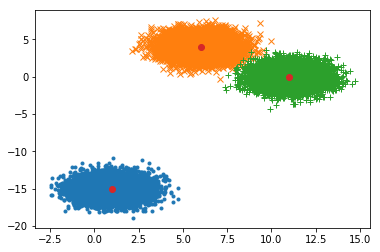

In [8]:
# Run K-means
start = time.time()
iters, centers, assignments = kmeans(d, 3)
end = time.time()
print ("Found in %.2f seconds" % (end-start)), iters, "iterations"
print ("Centroids:")
print (centers)
print ("Cluster assignments:", assignments)
plt.plot(a[:,0],a[:,1],'.')
plt.plot(b[:,0],b[:,1],'x')
plt.plot(c[:,0],c[:,1],'+')
plt.plot(centers[:,0],centers[:,1],'o')

In this part, you will see two different methods of calculating distance matrix in K means. Try to run them and compare difference.

In [9]:
# Another vectorized implementation of distance matrix
# Compute the sum of squared distances. Here rather than using tile methods to compute distances 
# between each point to the centroids, we choose a fully vectorized methods, which can help avoid 
# the out-of-memory(OOM) problem. Try to re-generate a dataset with shape (30000x2000, N=30000 D=2000) 
# and K remains to be 3. And run the following code to see the difference between these two methods.

points = tf.placeholder(tf.float32, [N,D], name='input') # A placeholder to hold our data
centroids = tf.Variable(tf.random_normal([K,D]))# A variable to show the cluster centers

# Method 1: Tiling
rep_centroids = tf.reshape(tf.tile(centroids, [N, 1]), [N, K, D])
rep_points = tf.reshape(tf.tile(points, [1, K]), [N, K, D])
sum_squares = tf.reduce_sum(tf.square(rep_points - rep_centroids), 
                            reduction_indices=2)

# Method 2: Vectorized method
def distance_matrix(a,b):
    '''
    inputs:
    a - N x D
    b - K x D
    '''
    N = tf.shape(a)[0]
    K = tf.shape(b)[0]
    a2 = tf.transpose(tf.tile([tf.reduce_sum(a**2, axis=1)], [K,1]))
    b2 = tf.tile([tf.reduce_sum(b**2, axis=1)], [N,1])
    ab = tf.matmul(a,tf.transpose(b))
    
    return a2+b2-2*ab

sum_squares_vec = distance_matrix(points, centroids)

init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    try:
        tic = time.time()
        sess.run(sum_squares, feed_dict={points:d})
        toc = time.time()
        print("computation time of basic distance calculation: {}".format(toc-tic))
    except Exception as e:
        print('*'*100)
        print(e)
        print('*'*100)

with tf.Session() as sess:
    sess.run(init)
    try:
        tic = time.time()
        sess.run(sum_squares_vec, feed_dict={points:d})
        toc = time.time()
        print("computation time of modified distance calculation: {}".format(toc-tic))
    except Exception as e:
        print('*'*100)
        print(e)
        print('*'*100)

computation time of basic distance calculation: 0.004038095474243164
computation time of modified distance calculation: 0.047548532485961914


#### Application: Clustering & Segmentation

Here is an interesting application of K-means clustering algorithm

In [10]:
from scipy.misc import imread

## Segmetation
img = imread('./pics/avengers.jpg')
img_points = np.reshape(img,(img.shape[0]*img.shape[1],-1))
_, colors, assignments = kmeans(img_points, 3)

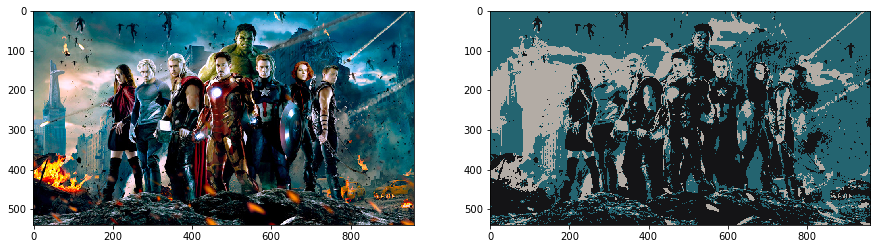

In [11]:
seg = np.reshape(colors[assignments,:].astype('uint8'), img.shape)

f, axarr = plt.subplots(1,2, figsize=(15,30))
axarr[0].imshow(img)
axarr[1].imshow(seg)

Now find more pictures as well as different K and create your own segmentation image.

Note: If you encounter out-of-memory(OOM) problem, try to modify the kmeans function by methods mentioned before or resize the input image into a smaller one. Hint: Use numpy.resize 

In [25]:
img = imread('./pics/rm.jpg')
img_points = np.reshape(img,(img.shape[0]*img.shape[1],-1))
_, colors, assignments = kmeans(img_points, 2)

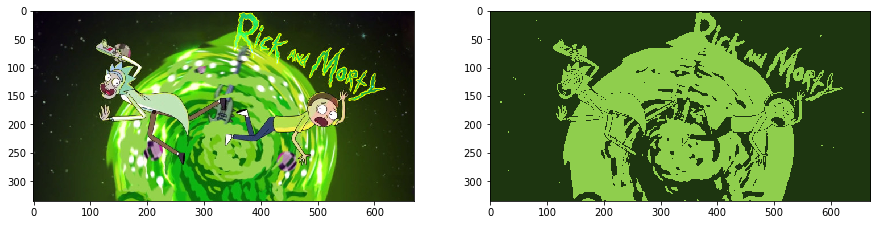

In [26]:
seg = np.reshape(colors[assignments,:].astype('uint8'), img.shape)

f, axarr = plt.subplots(1,2, figsize=(15,30))
axarr[0].imshow(img)
axarr[1].imshow(seg)

In [33]:
img = imread('./pics/got.jpg')
img_points = np.reshape(img,(img.shape[0]*img.shape[1],-1))
_, colors, assignments = kmeans(img_points, 4)

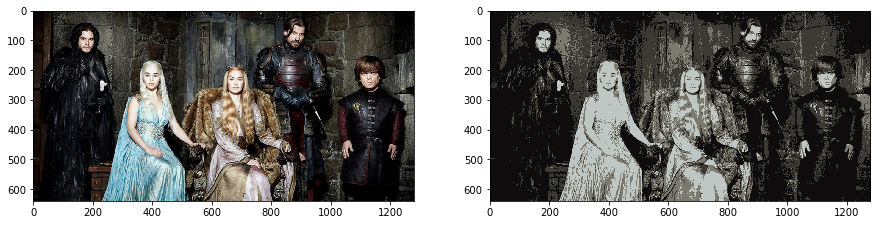

In [34]:
seg = np.reshape(colors[assignments,:].astype('uint8'), img.shape)

f, axarr = plt.subplots(1,2, figsize=(15,30))
axarr[0].imshow(img)
axarr[1].imshow(seg)